In [40]:
# KDD data set

In [164]:
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
from math import log, e
import math
from sklearn.utils import shuffle
import os
import pickle
from scipy.stats import iqr
from sklearn.model_selection import train_test_split

In [217]:
df = pd.read_csv('../Data/data_3/corrected',header=None)
len(df)

311029

In [218]:
df.head(5)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


# Attack types 

back dos  
buffer_overflow u2r  
ftp_write r2l   
guess_passwd r2l  
imap r2l  
ipsweep probe  
land dos  
loadmodule u2r  
multihop r2l  
neptune dos  
nmap probe  
perl u2r  
phf r2l  
pod dos  
portsweep probe  
rootkit u2r  
satan probe  
smurf dos  
spy r2l  
teardrop dos  
warezclient r2l  
warezmaster r2l  




In [219]:
for i in range(1,42):
    vals = set(list(df[i]))
    print(len(vals), df[i].dtype)
    if str(df[i].dtype) == 'float64' :
        bins = 10
        labels=list(range(0,bins))
        df[i] = pd.cut(df[i], bins,labels=labels)
        print('>',set(df[i]))
    


3 object
65 object
11 object
2504 int64
9202 int64
2 int64
3 int64
4 int64
18 int64
5 int64
2 int64
24 int64
2 int64
3 int64
21 int64
12 int64
4 int64
5 int64
1 int64
2 int64
2 int64
502 int64
471 int64
94 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
93 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
94 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
97 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
79 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
100 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
87 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
256 int64
256 int64
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
58 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 9}
100 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
101 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
100 float64
> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
38 object


In [220]:
normal_class = 'normal.'
anomaly_class = [
    'buffer_overflow.',
     'snmpguess.',
     'ipsweep.',
     'named.',
     'ps.',
     'xsnoop.', 
     'nmap.',
     'saint.',
     'rootkit.',
     'xterm.',
     'phf.',
     'imap.',
     'xlock.',
     'worm.',
     'satan.',
     'udpstorm.',
     'sendmail.',
     'land.',
     'httptunnel.'
]

In [221]:
df = df.rename(columns = {41:'tag'})

In [222]:
for i in set(df['tag']) :
    _list = list(df['tag'])
    c = _list.count(i)
    print('Class :', i,'| count :',c )

Class : land. | count : 9
Class : mailbomb. | count : 5000
Class : xsnoop. | count : 4
Class : neptune. | count : 58001
Class : ftp_write. | count : 3
Class : httptunnel. | count : 158
Class : xlock. | count : 9
Class : smurf. | count : 164091
Class : udpstorm. | count : 2
Class : guess_passwd. | count : 4367
Class : imap. | count : 1
Class : satan. | count : 1633
Class : buffer_overflow. | count : 22
Class : multihop. | count : 18
Class : loadmodule. | count : 2
Class : sendmail. | count : 17
Class : nmap. | count : 84
Class : back. | count : 1098
Class : perl. | count : 2
Class : teardrop. | count : 12
Class : phf. | count : 2
Class : ps. | count : 16
Class : normal. | count : 60593
Class : mscan. | count : 1053
Class : sqlattack. | count : 2
Class : worm. | count : 2
Class : apache2. | count : 794
Class : portsweep. | count : 354
Class : saint. | count : 736
Class : snmpgetattack. | count : 7741
Class : processtable. | count : 759
Class : warezmaster. | count : 1602
Class : xterm. |

In [223]:
df = df.loc[df['tag'].isin(anomaly_class) | df['tag'].isin([normal_class])]

In [224]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [225]:
def get_entropies(df):
    # ignore 1st and last columns
    num_cols = len(df.columns)
    res = {}
    
    for i in range(0,num_cols-1):   
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

attr_entropy = get_entropies(df)


attr_list = []
lb = 0.0
ub = 1.0
attr_list = []
for k,v in attr_entropy.items():
    if v > lb and v < ub:
        attr_list.append(k)

print('Valid attributes', attr_list)

0 0.03971627075802169
1 0.6007897320144822
2 0.35066445812827973
3 0.07286997650533905
4 0.6583603792728986
5 0.732150697836214
6 0.0019465213258308776
7 0.006498523965583729
8 0.0008492660563541693
9 0.01053383429588656
10 0.0011322424577050602
11 0.9373237441362494
12 0.0033166877202447935
13 0.00987489051594185
14 0.0007691749030668268
15 0.0026470173001336104
16 0.004055959739531042
17 0.0016373472687819214
18 0.01678891335432041
19 0
20 0.0019465213258308776
21 0.018608625647146507
22 0.4996175027216009
23 0.5389602457941228
24 0.030428190453309172
25 0.016341480078772605
26 0.07253502198810687
27 0.06208065875814696
28 0.09419011626966997
29 0.09393872103042142
30 0.42951896984894883
31 0.5670049291024207
32 0.41579380190576815
33 0.27547582191282055
34 0.12145621998312674
35 0.25790266911040927
36 0.03972131571337579
37 0.02545042207560552
38 0.011748413548042827
39 0.08574414430915366
40 0.06475849926867903
Valid attributes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,

In [226]:
attr_list = ['tag'] + attr_list
df = df[attr_list]
df.columns

Index(['tag',     0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,    18,
          20,    21,    22,    23,    24,    25,    26,    27,    28,    29,
          30,    31,    32,    33,    34,    35,    36,    37,    38,    39,
          40],
      dtype='object')

# Convert to ids then split the df 

In [227]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]

# -------------------- #
def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}
    
    _idx = 0
    for col in cols:
        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}
        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[_idx] = len(id2val_dict)
        _idx += 1 
    domain_dims = list(domain_dims_dict.values())
    domain_dims_res = domain_dims_dict

#     for col in list(df.columns):
#         if col in domain_dims_dict.keys():
#             print(col)
#             domain_dims_res[col] = domain_dims_dict[col]
#             domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    print(domain_dims)
    print(domain_dims_res)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [228]:
save_dir = '../Data/data_3'


In [229]:
id_columns = list(df.columns)
try:
    id_columns.remove('tag')
except:
    pass

In [230]:
# ------------------------------------- #
# convert all values to int

for c in list(id_columns):
    df[c] = df[c].astype(str)  

In [231]:
df.head(10)

,tag,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,normal.,0,udp,private,SF,105,146,0,0,0,...,255,254,9,0,0,0,0,0,0,0
1,normal.,0,udp,private,SF,105,146,0,0,0,...,255,254,9,0,0,0,0,0,0,0
2,normal.,0,udp,private,SF,105,146,0,0,0,...,255,254,9,0,0,0,0,0,0,0
6,normal.,0,udp,domain_u,SF,29,0,0,0,0,...,10,3,2,2,2,0,0,0,0,0
7,normal.,0,udp,private,SF,105,146,0,0,0,...,255,253,9,0,0,0,0,0,0,0
9,normal.,0,tcp,http,SF,223,185,0,0,0,...,71,255,9,0,0,0,0,0,0,0
11,normal.,0,tcp,http,SF,230,260,0,0,0,...,3,255,9,0,3,0,3,0,0,0
12,normal.,0,udp,private,SF,105,146,0,0,0,...,255,254,9,0,0,0,0,0,0,0
14,normal.,1,tcp,smtp,SF,3170,329,0,0,0,...,54,39,7,1,0,0,0,0,0,1
15,normal.,0,tcp,http,SF,297,13787,0,0,0,...,177,255,9,0,0,0,0,0,0,0


In [232]:
data_df_1 = convert_to_ids(
    df, 
    id_columns , 
    save_dir
)

[ 259    3   36   10 2398 9189    2    3    4   17    5    2   24    2
    3   20   12    3    4    2    2  449  341    6   10    9   10   10
   10   10  256  256   10   10   10    9   10   10   10   10]
{0: 259, 1: 3, 2: 36, 3: 10, 4: 2398, 5: 9189, 6: 2, 7: 3, 8: 4, 9: 17, 10: 5, 11: 2, 12: 24, 13: 2, 14: 3, 15: 20, 16: 12, 17: 3, 18: 4, 19: 2, 20: 2, 21: 449, 22: 341, 23: 6, 24: 10, 25: 9, 26: 10, 27: 10, 28: 10, 29: 10, 30: 256, 31: 256, 32: 10, 33: 10, 34: 10, 35: 9, 36: 10, 37: 10, 38: 10, 39: 10}


In [233]:
data_df_1.head(10)

,tag,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,normal.,223,0,25,6,1090,7619,0,0,0,...,129,238,8,0,0,0,0,0,0,0
1,normal.,223,0,25,6,1090,7619,0,0,0,...,129,238,8,0,0,0,0,0,0,0
2,normal.,223,0,25,6,1090,7619,0,0,0,...,129,238,8,0,0,0,0,0,0,0
6,normal.,223,0,2,6,1552,1385,0,0,0,...,94,26,0,1,1,0,0,0,0,0
7,normal.,223,0,25,6,1090,7619,0,0,0,...,129,125,8,0,0,0,0,0,0,0
9,normal.,223,2,16,6,1738,4449,0,0,0,...,93,129,8,0,0,0,0,0,0,0
11,normal.,223,2,16,6,56,7083,0,0,0,...,26,129,8,0,9,0,9,0,0,0
12,normal.,223,0,25,6,1090,7619,0,0,0,...,129,238,8,0,0,0,0,0,0,0
14,normal.,77,2,3,6,1884,8588,0,0,0,...,81,23,4,7,0,0,0,0,0,8
15,normal.,223,2,16,6,2048,3839,0,0,0,...,8,129,8,0,0,0,0,0,0,0


## Add in id


In [234]:
# add in id
new_col = list(range(1,len(df)+1))
try: 
    data_df_1.insert(
        loc=0, 
        column='id', 
        value=new_col
    )
except:
    pass
# ------------------------------------------------------ #

In [235]:
data_df_1.head(10)

,id,tag,0,1,2,3,4,5,6,7,...,31,32,33,34,35,36,37,38,39,40
0,1,normal.,223,0,25,6,1090,7619,0,0,...,129,238,8,0,0,0,0,0,0,0
1,2,normal.,223,0,25,6,1090,7619,0,0,...,129,238,8,0,0,0,0,0,0,0
2,3,normal.,223,0,25,6,1090,7619,0,0,...,129,238,8,0,0,0,0,0,0,0
6,4,normal.,223,0,2,6,1552,1385,0,0,...,94,26,0,1,1,0,0,0,0,0
7,5,normal.,223,0,25,6,1090,7619,0,0,...,129,125,8,0,0,0,0,0,0,0
9,6,normal.,223,2,16,6,1738,4449,0,0,...,93,129,8,0,0,0,0,0,0,0
11,7,normal.,223,2,16,6,56,7083,0,0,...,26,129,8,0,9,0,9,0,0,0
12,8,normal.,223,0,25,6,1090,7619,0,0,...,129,238,8,0,0,0,0,0,0,0
14,9,normal.,77,2,3,6,1884,8588,0,0,...,81,23,4,7,0,0,0,0,0,8
15,10,normal.,223,2,16,6,2048,3839,0,0,...,8,129,8,0,0,0,0,0,0,0


In [138]:
normal_class = 'normal.'
anomaly_class = [
    'buffer_overflow.',
     'snmpguess.',
     'ipsweep.',
     'named.',
     'ps.',
     'xsnoop.', 
     'nmap.',
     'saint.',
     'rootkit.',
     'xterm.',
     'phf.',
     'imap.',
     'xlock.',
     'worm.',
     'satan.',
     'udpstorm.',
     'sendmail.',
     'land.',
     'httptunnel.'
]

In [250]:
# there are 3 classes 
# taking the majority class as normal 
# Take samples from minority class 'draw' the class(es) with minimum number of points as anomalous
# this assumption has been done in CompreX


normal_df = pd.DataFrame(data_df_1[data_df_1['tag']==normal_class],copy=True)
len(normal_df)

60593

In [251]:
# get anomalies
tmp_df = pd.DataFrame(data_df_1[data_df_1['tag'].isin(anomaly_class)],copy=True)
all_anomalies_df = pd.DataFrame(tmp_df,copy=True)
len(all_anomalies_df)

5450

In [238]:
normal_df = normal_df.sample(frac=1)
# do a 85-15 split 
test_fac = 0.10
anomaly_frac = 0.075
num_CV = 5
train_x_file = 'train_x.pkl'

In [252]:
_df_1 = pd.DataFrame(normal_df,copy=True)
training_data, test_normal_df = train_test_split(_df_1, test_size=test_fac)
print(len(training_data),len(test_normal_df))
train_x_id = list(training_data['id'])

54533 6060


In [254]:
for i in range(num_CV):
    idx = i+1
    print('---')
    print(idx)
    
#     _df_1 = pd.DataFrame(df,copy=True)
#     training_data, test_normal_df = train_test_split(_df_1, test_size=test_fac)
#     print(len(training_data),len(test_normal_df))
    
    num_anom = int(anomaly_frac*(len(test_normal_df)))
    print(num_anom)
    
    _df = pd.DataFrame(
        test_normal_df,
        copy=True
    )
    print('Len of test set, without anomalies', len(_df))
    
    tmp = all_anomalies_df.sample(num_anom)
    _df = _df.append(tmp, ignore_index=True)
    print('Len of test set, with anomalies', len(_df) )
    
    test_all_ids = list(_df['id'])
    
    # ids of anomaly cases
    test_anomaly_ids = tmp['id']
    print('Size of set of anomalies + test', len(set(test_all_ids)))
    
    try:
        del _df['tag']
        del _df['id']
    except:
        pass
    
    test_x_data = _df.values
    test_x_file = 'test_x_' + str(idx) + '.pkl'
    test_x_file_path = os.path.join(save_dir,test_x_file)
    print(test_x_file_path)
    
    with open(test_x_file_path, 'wb') as fh:
        _td = [test_anomaly_ids, test_all_ids, test_x_data ]
        pickle.dump(
            _td, 
            fh, 
            pickle.HIGHEST_PROTOCOL
        )
    
    print(' Set vs list  of test ids :: ', len(set(test_all_ids)), len(test_all_ids) )
#     z_tmp = list(train_x_id)
#     z_tmp.extend(test_all_ids)
#     print(' >>> ', len(set(z_tmp)))
        
    if i == 0:
        
        try:
            del training_data['id']
            del training_data['tag']
        except:
            pass
        
        # Save the data
        train_x_data = training_data.values
        train_x_file_path = os.path.join(
            save_dir,
            train_x_file
        )
        print(train_x_file)
        with open(train_x_file_path, 'wb') as fh:
            pickle.dump(
                train_x_data, 
                fh, 
                pickle.HIGHEST_PROTOCOL
            )
        train_x_id_file = 'train_x_id.pkl'
        train_x_id_file_path = os.path.join(save_dir,train_x_id_file)
        with open(train_x_id_file_path, 'wb') as fh:
            pickle.dump(
                train_x_id, 
                fh, 
                pickle.HIGHEST_PROTOCOL
            )    
        

---
1
454
Len of test set, without anomalies 6060
Len of test set, with anomalies 6514
Size of set of anomalies + test 6514
../Data/data_3/test_x_1.pkl
 Set vs list  of test ids ::  6514 6514
train_x.pkl
---
2
454
Len of test set, without anomalies 6060
Len of test set, with anomalies 6514
Size of set of anomalies + test 6514
../Data/data_3/test_x_2.pkl
 Set vs list  of test ids ::  6514 6514
---
3
454
Len of test set, without anomalies 6060
Len of test set, with anomalies 6514
Size of set of anomalies + test 6514
../Data/data_3/test_x_3.pkl
 Set vs list  of test ids ::  6514 6514
---
4
454
Len of test set, without anomalies 6060
Len of test set, with anomalies 6514
Size of set of anomalies + test 6514
../Data/data_3/test_x_4.pkl
 Set vs list  of test ids ::  6514 6514
---
5
454
Len of test set, without anomalies 6060
Len of test set, with anomalies 6514
Size of set of anomalies + test 6514
../Data/data_3/test_x_5.pkl
 Set vs list  of test ids ::  6514 6514




# --------------------------------------------------------------------------- #

In [20]:
# data_df = pd.DataFrame(normal_df,copy=True)
# data_df = data_df.append(anomalies_df,ignore_index=True)

In [21]:

data_df = shuffle(data_df)

In [22]:
len(data_df)

31810

In [23]:
l1 = len(data_df[data_df['tag']==normal_class])
l2 = len(data_df)
l1 = l2-l1
print('Percentage of Anomalies :',  (l1/l2)*100 )

Percentage of Anomalies : 4.759509588179818


### Exploring the attributes


In [255]:
def entropy_calc(labels):
    n_labels = len(labels)
    if n_labels <= 1:
        return 0

    value,counts = np.unique(labels, return_counts=True)
    probs = counts / n_labels
    n_classes = np.count_nonzero(probs)

    if n_classes <= 1:
        return 0

    ent = 0.
    base = math.e 
    for i in probs:
        ent -= i * log(i, base)
    k = len(value)
    ent = ent/log(k,base)
    return ent

In [264]:
def get_entropies(df):
    # ignore 1st and last columns
    print(df.columns)
    res = {}
    for i in list(df.columns)[2:]:
        e = entropy_calc(list(df[i]))
        print(i,e)
        res[i] = e
    return res

attr_entropy = get_entropies(data_df_1)

Index([ 'id', 'tag',     0,     1,     2,     3,     4,     5,     6,     7,
           8,     9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    20,    21,    22,    23,    24,    25,    26,    27,    28,
          29,    30,    31,    32,    33,    34,    35,    36,    37,    38,
          39,    40],
      dtype='object')
0 0.03971627075802159
1 0.6007897320144822
2 0.35066445812827973
3 0.07286997650533904
4 0.6583603792728402
5 0.7321506978360731
6 0.0019465213258308776
7 0.006498523965583729
8 0.0008492660563541693
9 0.01053383429588656
10 0.0011322424577050602
11 0.9373237441362494
12 0.003316687720244794
13 0.00987489051594185
14 0.0007691749030668268
15 0.0026470173001336104
16 0.004055959739531042
17 0.0016373472687819214
18 0.01678891335432041
20 0.0019465213258308776
21 0.018608625647146507
22 0.499617502721602
23 0.5389602457941236
24 0.030428190453309172
25 0.016341480078772605
26 0.07253502198810687
27 0.06208065875814696
28 0.09419011626966997
2

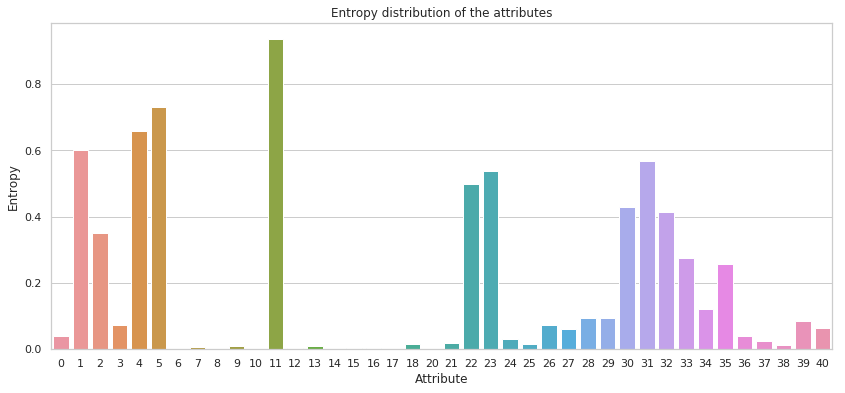

In [265]:
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(attr_entropy.keys()), y=list(attr_entropy.values()))
plt.xlabel('Attribute')
plt.ylabel('Entropy')
plt.title('Entropy distribution of the attributes')
plt.show()

## Filter attributes by threshold
### lb =0.05
### ub =0.95


In [268]:

lb = 0
ub = 1
attr_list = []
for k,v in attr_entropy.items():
    if v > lb and v < ub:
        attr_list.append(k)
        

In [269]:
len(attr_list)

40

In [30]:
valid_attr = ['id']
valid_attr.extend(attr_list)
valid_attr.append('tag')
data_df = data_df[valid_attr]

## Explore Arity of the domains

In [270]:
def get_domain_arity(df,attr_list):
    domain_arity = {a: len(set(df[a])) for a in attr_list}
    return domain_arity

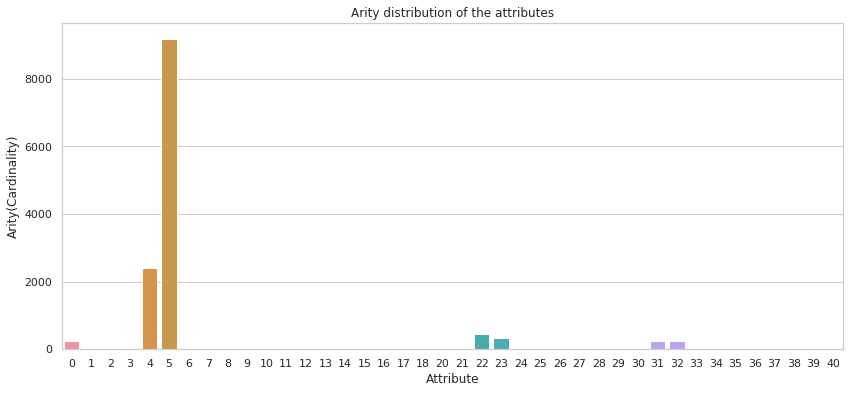

In [271]:

domain_arity = get_domain_arity(data_df_1,attr_list)
plt.figure(figsize=[14,6])
sns.set(style="whitegrid")
sns.barplot(x=list(domain_arity.keys()), y=list(domain_arity.values()))
plt.xlabel('Attribute')
plt.ylabel('Arity(Cardinality)')
plt.title('Arity distribution of the attributes')
plt.show()  

In [33]:
def replace_attr_with_id(row, attr, val2id_dict):
    val = row[attr]
    if val not in val2id_dict.keys():
        print(attr,val)
        return None
    else:
        return val2id_dict[val]


def convert_to_ids(df, cols , save_dir):
    domain_dims_dict = {}

    for col in cols:

        vals = list(set(df[col]))
        id2val_dict = {e[0]: e[1] for e in enumerate(vals, 0)}

        file_name = str(col) +'_id2val.pkl'
        with open( os.path.join(save_dir,file_name), 'wb') as f:
            pickle.dump(id2val_dict, f, pickle.HIGHEST_PROTOCOL)

        val2id_dict = {v: k for k, v in id2val_dict.items()}
        # replace
        df[col] = df.apply(
            replace_attr_with_id,
            axis=1,
            args=(
                col,
                val2id_dict,
            )
        )
        domain_dims_dict[col] = len(id2val_dict)

    domain_dims = []
    domain_dims_res = {}

    for col in list(df.columns):
        if col in domain_dims_dict.keys():
            print(col)
            domain_dims_res[col] = domain_dims_dict[col]
            domain_dims.append(domain_dims_dict[col])

    domain_dims =  np.array(domain_dims)
    file = 'domain_dims.pkl'
    f_path = os.path.join(save_dir, file)

    with open(f_path,'wb') as fh:
        pickle.dump(
            domain_dims_res,
            fh,
            pickle.HIGHEST_PROTOCOL
        )
    return df

In [34]:
# Save the data ina numpy array
_tmp = data_df[data_df['tag'] == normal_class]
_normal = list(_tmp['id'])


_tmp = data_df[(data_df['tag'] != normal_class)]
_anomaly =  list(_tmp['id'])


all_ids = list(data_df['id'])
record_id_dict ={
    'all':all_ids,
    'normal':_normal,
    'anomaly':_anomaly
}

In [35]:
save_dir = '../Data/data_3'

data_df_1 = pd.DataFrame(data_df,copy=True)
try:
    del data_df_1['id']
    del data_df_1['tag']
except:
    pass

# convert all values to int
for c in list(data_df_1.columns):
    data_df_1[c] = data_df_1[c].astype(str)  
cols = list(data_df_1.columns)
data_df_1 = convert_to_ids(data_df_1, cols , save_dir)
data_x = data_df_1.values
    

1
2
3
4
5
9
11
18
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
39
40


In [36]:
OP_PATH = '../Data/data_3'
data_x_file = 'data_3_x.pkl'
record_file = 'data_3_idList.pkl'

f_path_1 = os.path.join(OP_PATH,data_x_file)
f_path_2 = os.path.join(OP_PATH,record_file)

with open(f_path_1,'wb') as fh :
    pickle.dump(data_x, fh,pickle.HIGHEST_PROTOCOL)
    
with open(f_path_2,'wb') as fh :
    pickle.dump(record_id_dict, fh,pickle.HIGHEST_PROTOCOL)